<a href="https://colab.research.google.com/github/IsaacFigNewton/NoSKE-Pipeline/blob/main/NoSKE_Pipeline_Test_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get, import dependencies

In [12]:
# !git install git+https://github.com/IsaacFigNewton/NoSKE-Pipeline.git
!pip install -e .
!python -m spacy download en_core_web_lg

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///C:/Users/igeek/OneDrive/Documents/GitHub/NoSKE
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for noske (pyproject.toml): started
  Building editable for noske (pyproject.toml): finished with status 'done'
  Created wheel for noske: filename=noske-0.0.1-0.editable-py3-none-any.whl size=2616 sha256=2d9ede804697dc50595fddc241c0ef803c98c764db00f9e89f9b42a907bc907c
  Stored in directory: C:\Users\igeek\AppData\Local\Temp\pip-ephem-whee


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.8.0/en_core_web_lg-3.8.0-py3-none-any.whl (400.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Config

In [ ]:
import json
import spacy
import networkx as nx
from smied import SemanticMetagraph, PatternMatcher

In [14]:
nlp = spacy.load('en_core_web_lg')
text = "A dependency relationship describes how one element (the dependent) relies on another element (the supplier) for its functionality or meaning."
doc = nlp(text)

# Construct a dependency KG from the SpaCy token info
See [RDF schema spec docs](https://www.w3.org/TR/rdf-schema/) for edge relation guidance

In [15]:
G = SemanticMetagraph(doc)

## Visualize the KG

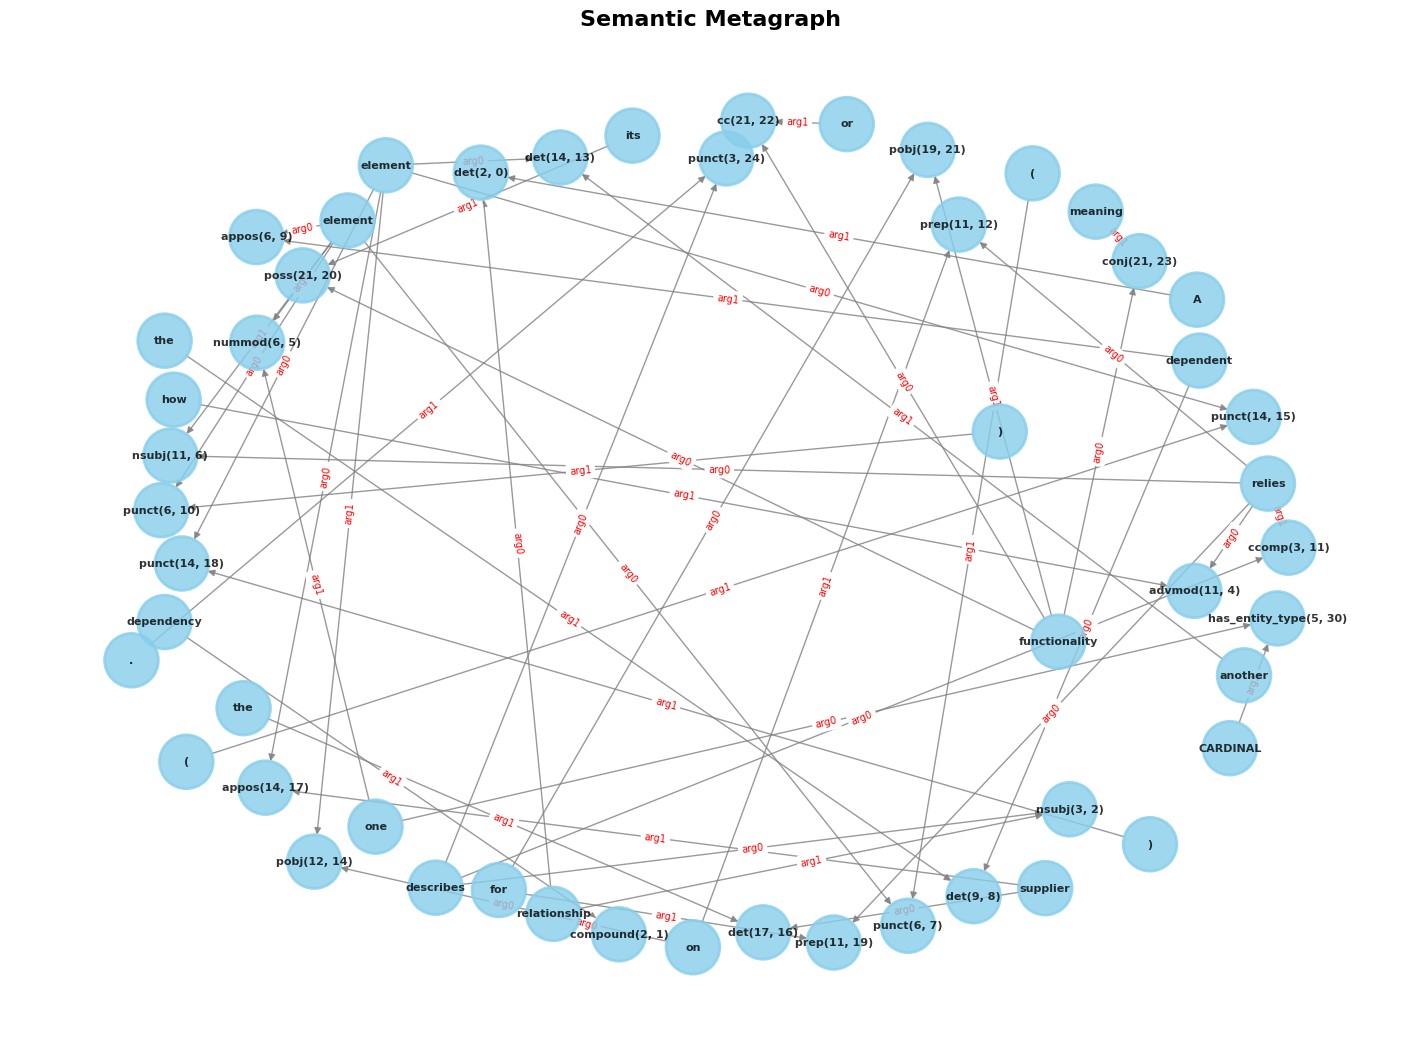

In [16]:
G.plot()

## List nodes, edges

In [17]:
G_json = G.to_json()
print("metaverts")
print(G_json['metaverts'])

metaverts
[
    {
        "type": "atomic",
        "value": "A",
        "metadata": {
            "text": "A",
            "pos": "DET",
            "head": 2,
            "lemma": "a",
            "idx": 0,
            "case": "upper",
            "type": "word",
            "Definite": [
                "Ind"
            ],
            "PronType": [
                "Art"
            ]
        }
    },
    {
        "type": "atomic",
        "value": "dependency",
        "metadata": {
            "text": "dependency",
            "pos": "NOUN",
            "head": 2,
            "lemma": "dependency",
            "idx": 1,
            "case": "lower",
            "type": "word",
            "Number": [
                "Sing"
            ]
        }
    },
    {
        "type": "atomic",
        "value": "relationship",
        "metadata": {
            "text": "relationship",
            "pos": "NOUN",
            "head": 3,
            "lemma": "relationship",
            "idx": 2

## List other stuff

# Get implied relations from phrase/clause-level structures

In [18]:
matcher = PatternMatcher(G)

## List the default patterns (ensure they loaded correctly)

In [19]:
print(json.dumps(matcher.pattern_loader.patterns, indent=4))

{
    "lexical": {
        "passive_voice": {
            "description": "Find passive voice constructions",
            "pattern": [
                {
                    "mv_type": "atomic",
                    "pos": [
                        "NOUN",
                        "PROPN"
                    ]
                },
                {
                    "mv_type": "directed_relation",
                    "relation_type": "nsubjpass",
                    "requires_reference": true
                },
                {
                    "mv_type": "atomic",
                    "pos": [
                        "VERB"
                    ]
                }
            ]
        },
        "compound_predicate": {
            "description": "Find compound predicates",
            "pattern": [
                {
                    "mv_type": "atomic",
                    "pos": [
                        "NOUN",
                        "PROPN"
                    ]
                }

## Try adding a new pattern to the list for matching

In [20]:
# Updated pattern using new metavertex format
pattern = {
    "name": "test_metavertex_pattern",
    "pattern": [
        {"mv_type": "atomic", "pos": ["NOUN", "PROPN"]},
        {"mv_type": "directed_relation", "relation_type": "nsubj", "requires_reference": True},
        {"mv_type": "atomic", "pos": ["VERB"]}
    ]
}
matcher.add_pattern(
    name=pattern["name"],
    pattern=pattern["pattern"],
    description="A test metavertex pattern for matching subject-verb relationships",
    category="custom"
)

In [21]:
test_pattern_as_string = json.dumps(
    matcher.pattern_loader.patterns["custom"],
    indent=4,
    default=str
)
print(test_pattern_as_string)

{
    "test_metavertex_pattern": {
        "description": "A test metavertex pattern for matching subject-verb relationships",
        "pattern": [
            {
                "mv_type": "atomic",
                "pos": [
                    "NOUN",
                    "PROPN"
                ]
            },
            {
                "mv_type": "directed_relation",
                "relation_type": "nsubj",
                "requires_reference": true
            },
            {
                "mv_type": "atomic",
                "pos": [
                    "VERB"
                ]
            }
        ]
    }
}


# Attempt path matching on semantic KG

In [22]:
# Test metavertex pattern matching
print("=== Metavertex Structure Analysis ===")
analysis = matcher.analyze_metavertex_patterns()
print(f"Total metavertices: {analysis['total_metaverts']}")
print(f"Atomic count: {analysis['atomic_count']}")
print(f"Directed relations: {analysis['directed_relation_count']}")
print(f"Relation types: {analysis['relation_types']}")
print(f"POS distribution: {analysis['pos_distribution']}")
print()

print("=== Testing Metavertex Basic Patterns ===")
# Test some basic metavertex patterns
try:
    atomic_nouns = matcher("metavertex_basic", "atomic_noun")
    print(f"Found {len(atomic_nouns)} atomic noun matches:")
    for match in atomic_nouns[:3]:  # Show first 3
        print(f"  {match}")
    print()
    
    directed_relations = matcher("metavertex_basic", "directed_relation")
    print(f"Found {len(directed_relations)} directed relation matches:")
    for match in directed_relations[:3]:  # Show first 3
        print(f"  {match}")
    print()
except KeyError as e:
    print(f"Pattern not found: {e}")

print("=== Testing Custom Metavertex Pattern ===")
custom_matches = matcher("custom", "test_metavertex_pattern")
print(f"Found {len(custom_matches)} custom pattern matches:")
for match in custom_matches:
    print(f"  {match}")
print()

print("=== All Pattern Summary ===")
all_matches = matcher.get_pattern_summary()

=== Metavertex Structure Analysis ===
Total metavertices: 51
Atomic count: 26
Directed relations: 25
Relation types: {'det': 4, 'compound': 1, 'nsubj': 2, 'ccomp': 1, 'punct': 5, 'has_entity_type': 1, 'nummod': 1, 'appos': 2, 'advmod': 1, 'prep': 2, 'pobj': 2, 'poss': 1, 'cc': 1, 'conj': 1}
POS distribution: {'DET': 4, 'NOUN': 7, 'VERB': 2, 'SCONJ': 1, 'NUM': 1, 'PUNCT': 5, 'ADJ': 1, 'ADP': 2, 'PRON': 1, 'CCONJ': 1}

=== Testing Metavertex Basic Patterns ===
Found 0 atomic noun matches:

Found 25 directed relation matches:
  {'indices': [25], 'metaverts': [((2, 0), {'relation': 'det', 'rel_pos': 'before'})], 'summary': '[det]'}
  {'indices': [26], 'metaverts': [((2, 1), {'relation': 'compound', 'rel_pos': 'before'})], 'summary': '[compound]'}
  {'indices': [27], 'metaverts': [((3, 2), {'relation': 'nsubj', 'rel_pos': 'before'})], 'summary': '[nsubj]'}

=== Testing Custom Metavertex Pattern ===
Found 0 custom pattern matches:

=== All Pattern Summary ===
Found 25 matches for metavertex_

In [23]:
# Additional metavertex analysis and pattern testing
print("=== Finding Specific Metavertex Types ===")

# Find atomic metavertices with specific POS tags
nouns = matcher.find_atomic_metavertices(pos="NOUN")
print(f"Found {len(nouns)} NOUN metavertices: {nouns}")

verbs = matcher.find_atomic_metavertices(pos="VERB")
print(f"Found {len(verbs)} VERB metavertices: {verbs}")

# Find relation metavertices
nsubj_relations = matcher.find_relation_metavertices(relation_type="nsubj")
print(f"Found {len(nsubj_relations)} nsubj relations: {nsubj_relations}")

dobj_relations = matcher.find_relation_metavertices(relation_type="dobj")
print(f"Found {len(dobj_relations)} dobj relations: {dobj_relations}")

print("\n=== Metavertex Chains ===")
# Get chains starting from first atomic metavertex
if nouns:
    chains = matcher.get_metavertex_chain(nouns[0], max_depth=2)
    print(f"Chains starting from metavertex {nouns[0]}: {chains}")

print("\n=== Detailed Metavertex Structure ===")
print("Metavertices:")
for i, mv in enumerate(G.metaverts):
    mv_content, mv_metadata = mv if len(mv) == 2 else (mv[0], {})
    print(f"  {i}: {mv_content} | {mv_metadata}")

=== Finding Specific Metavertex Types ===
Found 7 NOUN metavertices: [1, 2, 6, 14, 17, 21, 23]
Found 2 VERB metavertices: [3, 11]
Found 2 nsubj relations: [27, 38]
Found 0 dobj relations: []

=== Metavertex Chains ===
Chains starting from metavertex 1: [[1, 26]]

=== Detailed Metavertex Structure ===
Metavertices:
  0: A | {'text': 'A', 'pos': 'DET', 'head': 2, 'lemma': 'a', 'idx': 0, 'case': 'upper', 'type': 'word', 'Definite': ['Ind'], 'PronType': ['Art']}
  1: dependency | {'text': 'dependency', 'pos': 'NOUN', 'head': 2, 'lemma': 'dependency', 'idx': 1, 'case': 'lower', 'type': 'word', 'Number': ['Sing']}
  2: relationship | {'text': 'relationship', 'pos': 'NOUN', 'head': 3, 'lemma': 'relationship', 'idx': 2, 'case': 'lower', 'type': 'word', 'Number': ['Sing']}
  3: describes | {'text': 'describes', 'pos': 'VERB', 'head': 3, 'lemma': 'describe', 'idx': 3, 'case': 'lower', 'type': 'word', 'Number': ['Sing'], 'Person': ['3'], 'Tense': ['Pres'], 'VerbForm': ['Fin']}
  4: how | {'text':